## Chapter 8 - Exercise 3: Mexico

#### Thực hiện các yêu cầu sau, và đối chiếu với kết quả cho trước:

In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Map: Mexico

In [2]:
# Câu 1: Tạo biểu đồ có center là Mexico (location= [23.6345, -102.5528]) với zoom level là 5
mexico = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
mexico

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
 <p><img src=" 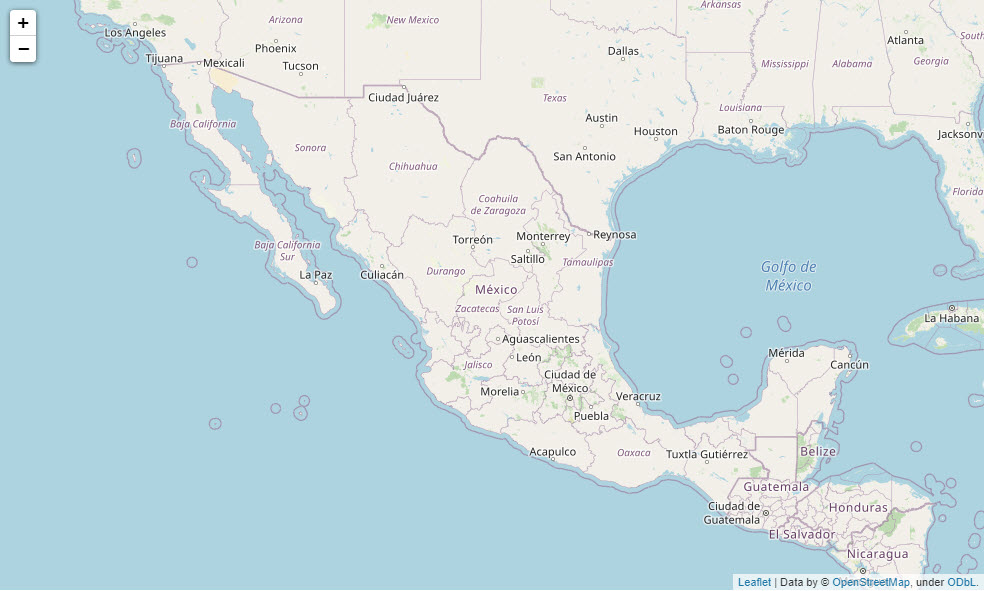 " alt="Hinh"></p>

</details>

In [5]:
# Câu 2: Tạo OpenStreetMap với center là Mexico  with zoom level 6.3
mexico_openstreet = folium.Map(location=[23.6345, -102.5528], tiles='OpenStreetMap', zoom_start=6.3)
mexico_openstreet

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
 <p><img src=" 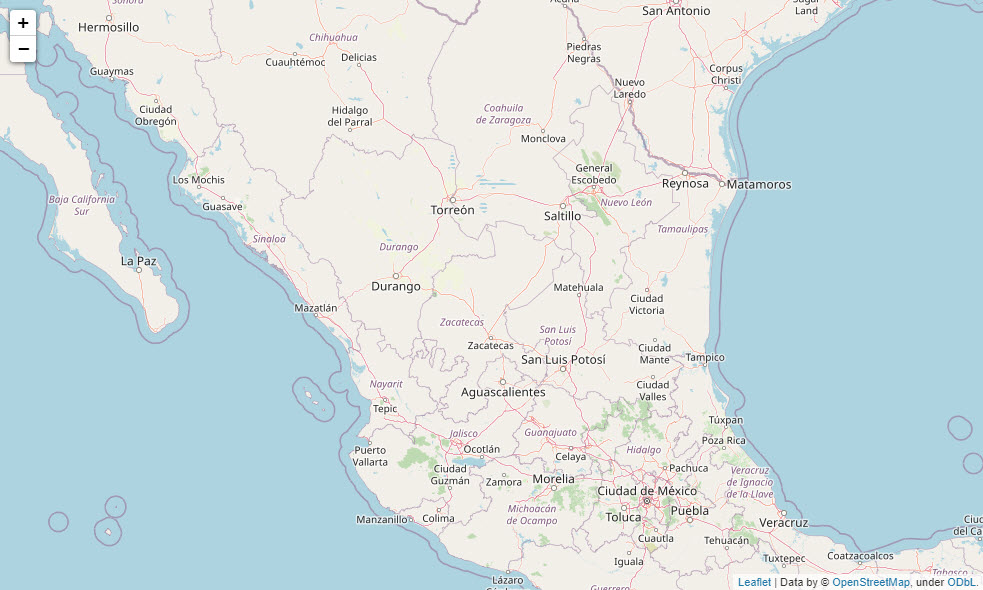 " alt="Hinh"></p>

</details>

### Map với Marker
#### San Francisco Police Department Incidents năm 2016 - được cung cấp từ cổng thông tin dữ liệu công cộng San Francisco. Các sự cố bắt nguồn từ hệ thống báo cáo sự cố tội phạm của Sở cảnh sát San Francisco (SFPD). Được cập nhật hàng ngày, hiển thị dữ liệu cho cả năm 2016. Địa chỉ và vị trí đã được ẩn danh bằng cách di chuyển đến giữa khối (mid-block) hoặc đến một giao lộ (intersection)

In [7]:
# Câu 1: Đọc dữ liệu Police_Department_Incidents_-Previous_Year__2016.csv và lưu vào df_incidents
df_incidents = pd.read_csv('./Police_Department_Incidents_-_Previous_Year__2016_.csv')

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


So each row consists of 13 features:
> 1. **IncidntNum**: Incident Number
> 2. **Category**: Category of crime or incident
> 3. **Descript**: Description of the crime or incident
> 4. **DayOfWeek**: The day of week on which the incident occurred
> 5. **Date**: The Date on which the incident occurred
> 6. **Time**: The time of day on which the incident occurred
> 7. **PdDistrict**: The police department district
> 8. **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9. **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location 
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

In [14]:
# Cho biết thông tin của df_incidents
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150500 non-null int64
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Location      150500 non-null object
PdId          150500 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB
</pre>
  
</details>

In [9]:
# Hiển thị 5 dòng dữ liệu đầu của df_incidents
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>IncidntNum</th>
      <th>Category</th>
      <th>Descript</th>
      <th>DayOfWeek</th>
      <th>Date</th>
      <th>Time</th>
      <th>PdDistrict</th>
      <th>Resolution</th>
      <th>Address</th>
      <th>X</th>
      <th>Y</th>
      <th>Location</th>
      <th>PdId</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>120058272</td>
      <td>WEAPON LAWS</td>
      <td>POSS OF PROHIBITED WEAPON</td>
      <td>Friday</td>
      <td>01/29/2016 12:00:00 AM</td>
      <td>11:00</td>
      <td>SOUTHERN</td>
      <td>ARREST, BOOKED</td>
      <td>800 Block of BRYANT ST</td>
      <td>-122.403405</td>
      <td>37.775421</td>
      <td>(37.775420706711, -122.403404791479)</td>
      <td>12005827212120</td>
    </tr>
    <tr>
      <th>1</th>
      <td>120058272</td>
      <td>WEAPON LAWS</td>
      <td>FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE</td>
      <td>Friday</td>
      <td>01/29/2016 12:00:00 AM</td>
      <td>11:00</td>
      <td>SOUTHERN</td>
      <td>ARREST, BOOKED</td>
      <td>800 Block of BRYANT ST</td>
      <td>-122.403405</td>
      <td>37.775421</td>
      <td>(37.775420706711, -122.403404791479)</td>
      <td>12005827212168</td>
    </tr>
    <tr>
      <th>2</th>
      <td>141059263</td>
      <td>WARRANTS</td>
      <td>WARRANT ARREST</td>
      <td>Monday</td>
      <td>04/25/2016 12:00:00 AM</td>
      <td>14:59</td>
      <td>BAYVIEW</td>
      <td>ARREST, BOOKED</td>
      <td>KEITH ST / SHAFTER AV</td>
      <td>-122.388856</td>
      <td>37.729981</td>
      <td>(37.7299809672996, -122.388856204292)</td>
      <td>14105926363010</td>
    </tr>
    <tr>
      <th>3</th>
      <td>160013662</td>
      <td>NON-CRIMINAL</td>
      <td>LOST PROPERTY</td>
      <td>Tuesday</td>
      <td>01/05/2016 12:00:00 AM</td>
      <td>23:50</td>
      <td>TENDERLOIN</td>
      <td>NONE</td>
      <td>JONES ST / OFARRELL ST</td>
      <td>-122.412971</td>
      <td>37.785788</td>
      <td>(37.7857883766888, -122.412970537591)</td>
      <td>16001366271000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>160002740</td>
      <td>NON-CRIMINAL</td>
      <td>LOST PROPERTY</td>
      <td>Friday</td>
      <td>01/01/2016 12:00:00 AM</td>
      <td>00:30</td>
      <td>MISSION</td>
      <td>NONE</td>
      <td>16TH ST / MISSION ST</td>
      <td>-122.419672</td>
      <td>37.765050</td>
      <td>(37.7650501214668, -122.419671780296)</td>
      <td>16000274071000</td>
    </tr>
  </tbody>
</table>
</div></div>
  
</details>

In [10]:
# Cho biết kích thước của df_incidents
df_incidents.shape

(150500, 13)

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>(150500, 13)</pre>
  
</details>

In [16]:
# Câu 2: Rút trích dữ liệu: có đến 150.500 tội phạm, diễn ra vào năm 2016. 
# Tạo bộ dữ liệu mới chỉ lấy 100 tội phạm đầu tiên trong bộ dữ liệu df_incidents
df_incidents_100 = df_incidents.iloc[0: 100, :]
# Cho biết kích thước của df_incidents 
df_incidents_100.shape

(100, 13)

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>(100, 13)</pre>
  
</details>

In [18]:
# Câu 3: Tạo biểu đồ có center là San Francisco (location= [37.77, -122.42]) với zoom level là 12
san_francisco = folium.Map(location=[37.77, -122.42], zoom_start=12)
san_francisco

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
 <p><img src=" 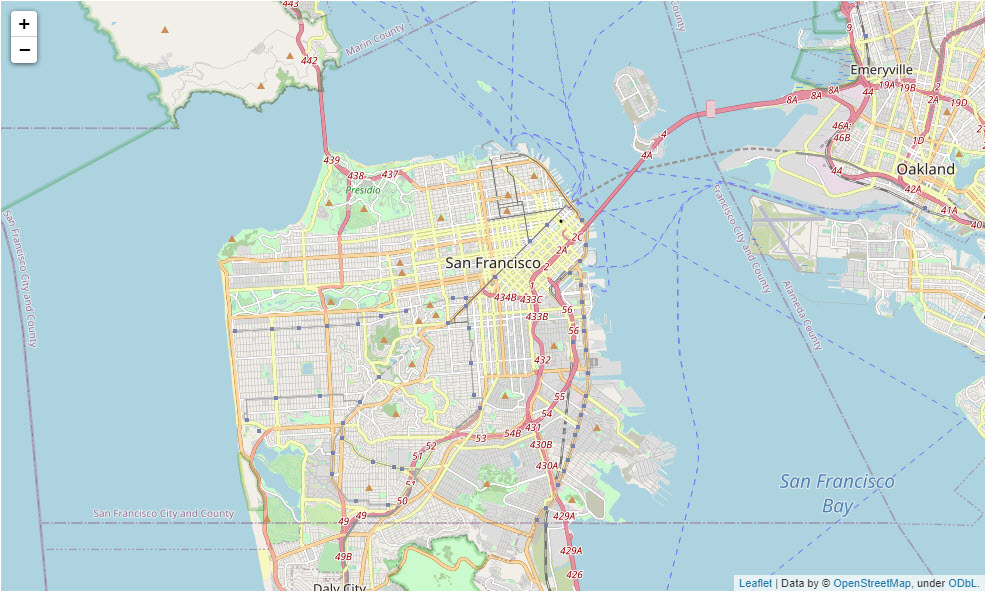 " alt="Hinh"></p>

</details>

In [20]:
# Câu 4: Đưa 100 điểm tội phạm lên bản đồ (với marker)
incident_markers = folium.map.FeatureGroup()

for lat, lng in zip(df_incidents_100.Y, df_incidents_100.X):
    incident_markers.add_child(
        folium.features.Marker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

san_francisco.add_child(incident_markers)

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
 <p><img src=" 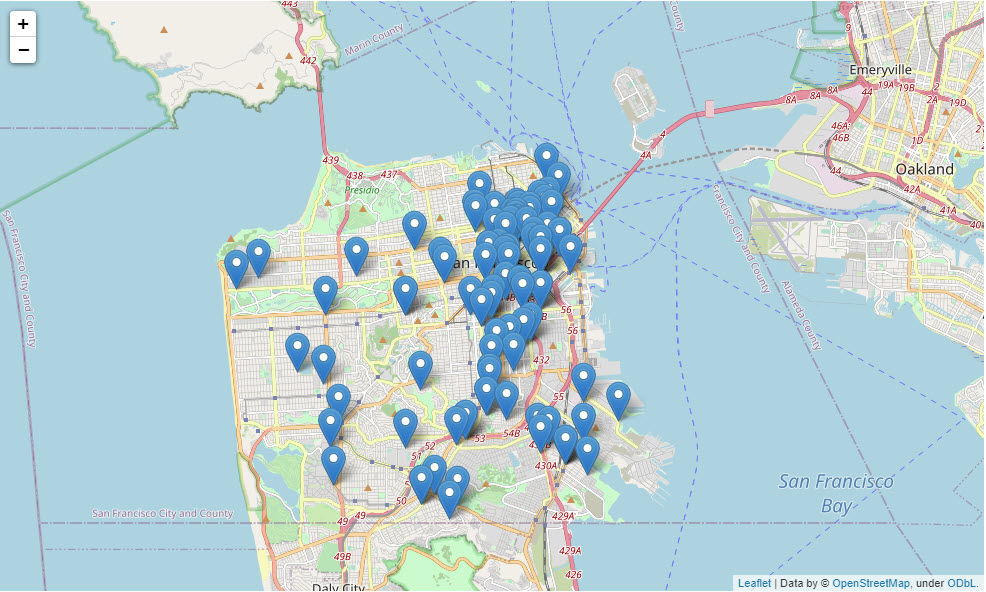 " alt="Hinh"></p>

</details>

In [26]:
# Câu 5: Thêm pop-up text sẽ được hiển thị thông tin Category khi người dùng di chuyển chuột qua chuột qua marker
incident_markers = folium.features.FeatureGroup()

for lat, ln in zip(df_incidents_100.Y, df_incidents_100.X):
    incident_markers.add_child(
        folium.features.Marker(
            [lat, ln],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=''
        )
    )

latitues = list(df_incidents_100.Y)
longitudes = list(df_incidents_100.X)
labels = list(df_incidents_100.Category)

for lat, ln, label in zip(latitues, longitudes, labels):
    folium.Marker([lat, ln], popup=label).add_to(san_francisco)

san_francisco

In [ ]:
# Câu 6: Để cho bản đồ khỏi rối, bỏ đi các location marker, và chỉ thêm text vào từng circle marker



<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
 <p><img src="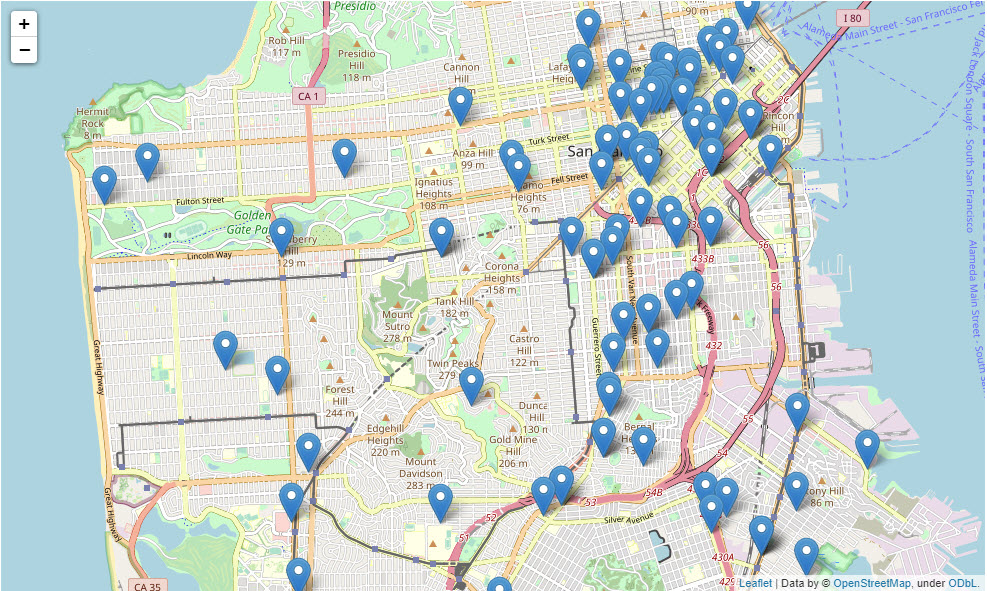  " alt="Hinh"></p>

</details>

In [ ]:
# Câu 7: Nhóm các markers vào các cluster. Mỗi cluster sẽ hiển thị số lượng các tội phạm trong mỗi neighborhood. 
# Gợi ý: Sử dụng MarkerCluster object và thêm tất cả các data point trong dataframe vào object này



<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
 <p><img src=" 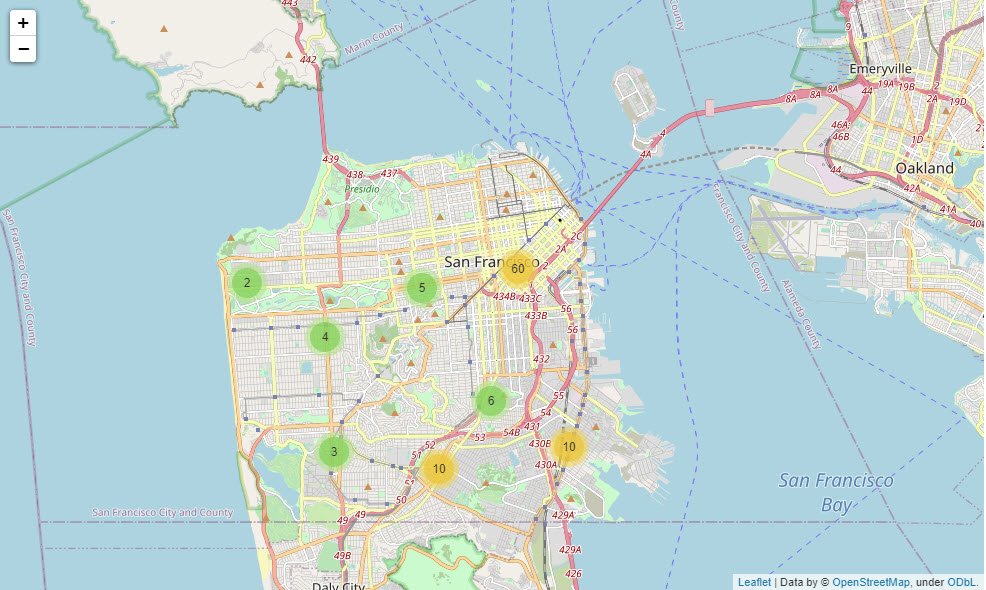 " alt="Hinh"></p>

</details>